In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-09-20
time: 10:05:55


In [3]:
prompt1 = "Simulate PDB ID 1MBN at 400 K for 0.5 ns. Plot the RMSD of both over time and compare the final secondary structures at the end of the simulations. Get information about this protein, such as the number of residues and chains, etc."
llm_var = "gpt-4o-2024-08-06"
tools = "all"
# agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  gpt-4o-2024-08-06 
Temperature:  0.1


In [5]:
agent.run(prompt1)

Thought: To address the request, I need to perform several tasks: download the PDB file for 1MBN, set up and run a molecular dynamics simulation at 400 K for 0.5 ns, compute the RMSD over time, analyze the final secondary structures, and gather information about the protein such as the number of residues and chains. I will start by downloading the PDB file for 1MBN.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1MBN"
}
```PDB file found with this ID: 1MBN
Thought: Now that I have the PDB file for 1MBN, I will proceed to gather information about the protein, such as the number of residues, chains, and other structural details. This will help in understanding the protein before setting up the simulation.

Action:
```
{
  "action": "SummarizeProteinStructure",
  "action_input": {
    "traj_file": "/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/pdb/1MBN_raw_20240919_224721.pdb"
  }
}
```To proceed with the simulation, I need to set up and run a molecular dynamics si

ReadTimeout: The read operation timed out

In [4]:
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools,ckpt_dir="ckpt_392")

In [7]:
agent.run("From the simulation you just ran, calculate rmsd")

Thought: To calculate the RMSD from a simulation, I need to know the file paths for the topology and trajectory files generated from the simulation. Since the context does not provide these details, I will first list the available paths to identify the relevant files. Then, I will proceed to calculate the RMSD using the appropriate tool.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the RMSD, I need to use the trajectory file and the topology file from the simulation. Based on the paths listed, I will use the trajectory file `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd` and the topology file `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb` to compute the RMSD.

Action:
```json
{
  "action": "ComputeRMSD",
  "action_input": {
    "top_path": "/Users/jorgemedina/Desktop/md-a

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [8]:
agent.run("From the simulation you just ran, calculate secondary structure")

Thought: To calculate the secondary structure from a simulation, I need to use the ComputeDSSP tool, which computes the DSSP (secondary structure) assignment for a protein trajectory. I need to know the trajectory file path and optionally the topology file path. Since the context of the simulation is not provided, I will first list the available paths to identify the trajectory file.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the secondary structure from the simulation, I will use the ComputeDSSP tool. I have identified the trajectory file path and the topology file path from the registry. The trajectory file is `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd` and the topology file is `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`. I will compute the DSSP for all frames 

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
agent.run("From the simulation you just ran, calculate radial distribution function")

Thought: To calculate the radial distribution function (RDF) from a simulation, I need to know the trajectory file path and optionally the topology file path. Since the context does not provide these details, I will first list the available paths to identify the relevant files for the RDF calculation.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the radial distribution function (RDF), I will use the trajectory file and the topology file identified in the registry paths. The relevant files for this calculation are:

- Trajectory file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd`
- Topology file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`

I will proceed to calculate the RDF using these files.

Action:
```json
{
  "action": "RDFTool",
  "action_input": {
    "input":

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

Thought: To calculate the Principal Component Analysis (PCA) of a molecular dynamics trajectory, I need to use the PCATool. However, I first need to identify the trajectory file from the simulation that was just run. I will list the registry paths to find the trajectory file.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the Principal Component Analysis (PCA) of the molecular dynamics trajectory, I need to use the PCATool with the appropriate trajectory and topology files. From the paths listed, the trajectory file is `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd` and the topology file is `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`. I will proceed with the PCA calculation using these files.

Action:
```json
{
  "action": "PCATool",
  "action_input": {
    "input": {
  

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

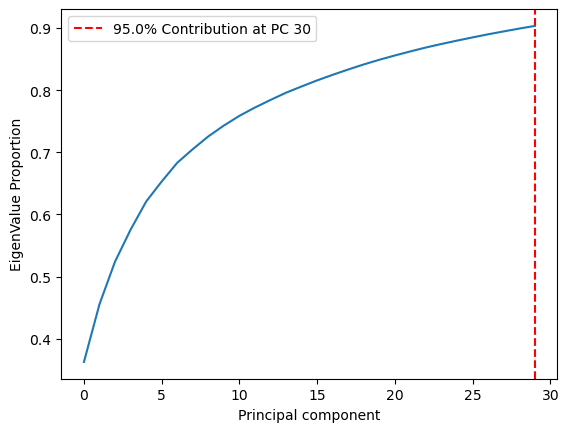

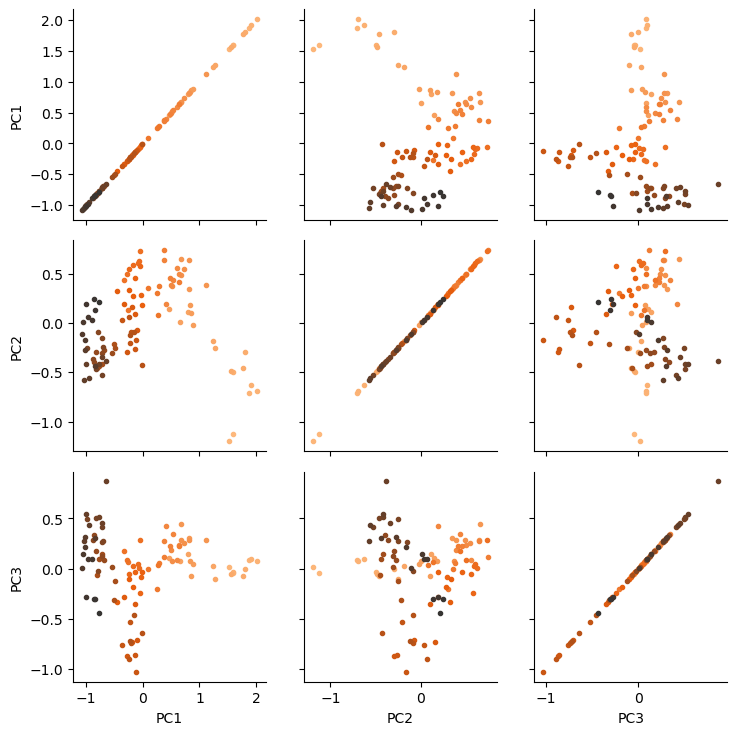

In [5]:
agent.run("From the simulation you just ran, calculate pca")

In [5]:
agent.run("From the simulation you just ran, calculate rmsf")

Thought: To calculate the root mean square fluctuation (RMSF) from a simulation, I need to know the file paths for the topology and trajectory files generated from the simulation. Since the context does not provide these details, I will first list the registry paths to identify the available files. Then, I will proceed to calculate the RMSF using the appropriate files.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the RMSF, I need to use the trajectory and topology files from the simulation. Based on the paths listed, I will use the following files:

- Trajectory file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd`
- Topology file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`

Now, I will proceed to calculate the RMSF using these files.

Action:
```json
{
  "action": "C

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
agent.run("From the simulation you just ran, calculate moment of inertia")

Thought: To calculate the moment of inertia, I need to know the file paths for the topology and trajectory files from the simulation that was just run. I will first list the registry paths to identify the relevant files. 

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the moment of inertia, I need to use the topology and trajectory files from the simulation. Based on the paths listed, the relevant files are:

- Topology file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`
- Trajectory file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd`

I will now proceed to calculate the moment of inertia using these files.

Action:
```json
{
  "action": "MomentOfInertia",
  "action_input": {
    "top_file": "/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [7]:
agent.run("From the simulation you just ran, calculate ppi")

Thought: To calculate the minimum heavy-atom distance between peptide and protein (ppi), I need to use the `ppi_distance` tool. However, I need the file path of the PDB containing the protein-protein interaction from the simulation. Since the context of the simulation is not provided, I will first list the registry paths to identify the relevant PDB file.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the minimum heavy-atom distance between peptide and protein (ppi), I need to use the `ppi_distance` tool. From the list of paths, I will select the cleaned PDB file that likely contains the protein-protein interaction. The file path `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/pdb/1MBN_Clean_20240919_224730.pdb` seems appropriate for this purpose.

Action:
```json
{
  "action": "ppi_distance",
  "action_input": {
    "pdb_file": "/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/pdb/1MBN_Clean_20240919_224730.pdb",
    

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
agent.run("From the simulation you just ran, calculate radius of gyration")

Thought: To calculate the radius of gyration from a simulation, I need to know the trajectory and topology file paths. Since the context does not provide these details, I will first list the available paths to identify the relevant files for the simulation.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the radius of gyration, I need to use the trajectory and topology files from the simulation. Based on the paths listed, the relevant files are:

- Trajectory file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd`
- Topology file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`

I will now proceed to calculate the radius of gyration using these files.

Action:
```json
{
  "action": "RadiusofGyrationAverage",
  "action_input": {
    "traj_file": "/Users/jorgemedina/Desktop/md-ag

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
agent.run("From the simulation you just ran, calculate SASA")

Thought: To calculate the Solvent Accessible Surface Area (SASA) for a molecule or protein, I need the file paths for the topology and trajectory files from the simulation. Since the context does not provide these file paths, I will first list the available paths to identify the relevant files.

Action:
```
{
  "action": "ListRegistryPaths",
  "action_input": {
    "paths": "paths"
  }
}
```To calculate the Solvent Accessible Surface Area (SASA), I will use the topology file and the trajectory file from the simulation. Based on the paths listed, I will use the following files:

- Topology file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TOP_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.pdb`
- Trajectory file: `/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_392/records/TRAJ_sim0_224734_1MBN_Clean_20240919_224730_20240919_224735.dcd`

Now, I will proceed to calculate the SASA using these files.

Action:
```json
{
  "action": "SolventAccessibleSurfaceArea",
  "acti

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
agent.run("Simulate PDB ID 1MBN at two different temperatures: 300 K and 400 K for 1 ns each. Plot the RMSD of both over time and compare the final secondary structures at the end of the simulations. Get information about this protein, such as the number of residues and chains, etc.")

Thought: To address the question, I need to perform the following steps:

1. Download the PDB file for the protein with PDB ID 1MBN.
2. Set up and run molecular dynamics simulations at two different temperatures (300 K and 400 K) for 1 ns each.
3. Compute and plot the RMSD over time for both simulations.
4. Analyze the final secondary structures at the end of each simulation.
5. Gather information about the protein, such as the number of residues and chains.

I'll start by downloading the PDB file for 1MBN.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1MBN"
  }
}
```PDB file found with this ID: 1MBN
To proceed with the task, I need to set up and run molecular dynamics simulations for the downloaded PDB file at two different temperatures (300 K and 400 K) for 1 ns each. After that, I will compute and plot the RMSD over time for both simulations and analyze the final secondary structures. Additionally, I will gather information about the protein, such

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [9]:
agent_2 = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
agent_2.run("Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions.")

Thought: To simulate the protein 1L6X at different pH levels, I need to first download the PDB file for 1L6X. Then, I will set up and run simulations at pH 5.0 and 8.8. After the simulations, I will analyze the Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF) for both conditions. Let's start by downloading the PDB file for 1L6X.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1L6X"
}
```PDB file found with this ID: 1L6X
Thought: Now that I have the PDB file for 1L6X, I need to set up and run simulations at pH 5.0 and 8.8. I will first clean the PDB file to ensure it is ready for simulation, then set up the simulation parameters for each pH condition. After running the simulations, I will analyze the SASA and RMSF for both conditions.

Action:
```
{
  "action": "CleaningToolFunction",
  "action_input": {
    "pdb_path": "/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_396/pdb/1L6X_raw_20240920_144931.pdb",
    "replace_nonstandard_residues"

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [ ]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-09-19
time: 14:48:12


In [7]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_100840: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_100840
 1MBN_100848: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_100853: Initial positions for simulation sim0_100853
 sim0_100853: Basic Simulation of Protein /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_395/pdb/1MBN_Clean_20240920_100848.pdb
 rec0_100854: Simulation trajectory for protein /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_395/pdb/1MBN_Clean_20240920_100848.pdb and simulation sim0_100853
 rec1_100854: Simulation state log for protein /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_395/pdb/1MBN_Clean_20240920_100848.pdb and simulation sim0_100853
 rec2_100854: Simulation pdb frames for protein /Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_395/pdb/1MBN_Clean_20240920_100848.pdb and simulation sim0_100853
 top_sim0_105050: Initial positions for simulation sim0

In [8]:
#plotting rmsd of both simulations
from IPython.display import Image
# rmsd1ID = 'fig0_192900'
# rmsd2ID = 'fig0_192903'
# path1 = registry.get_mapped_path(rmsd1ID)
# path2 = registry.get_mapped_path(rmsd2ID)


Image(filename="rmsd_TOP_sim0_100853_1MBN_Clean_20240920_100848_20240920_100854.pdb")

ValueError: Cannot embed the 'pdb' image format

In [ ]:
# Image(filename=path2)

# Experiment Result:
### Completed without Exception or TimeOut Errors  ✅
### Attempted all necessary steps ❌
### Not Hallucination ❌
### Process make sense  ❌
### Correct Answer   ❌
### Number of steps completed: 0️⃣
### % steps completed: 0️⃣%
